In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [24]:
df = pd.read_csv('/content/a_Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Conduct Exploratory Data Analysis (EDA)


In [25]:
# overall infromation like what is dtype and check missing value and column names and How many rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [26]:
# 5 number summary
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [27]:
# rename columns name
df.rename(columns={'Annual Income (k$)':'Annual_Income','Genre':"Gender"},inplace=True)

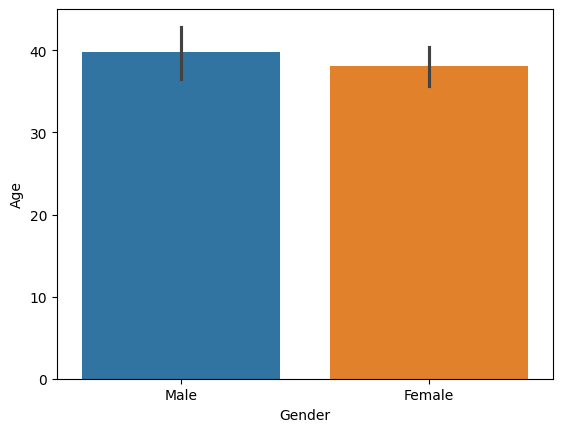

In [28]:
sns.barplot(x='Gender',y='Age',data=df,hue='Gender')
plt.show()

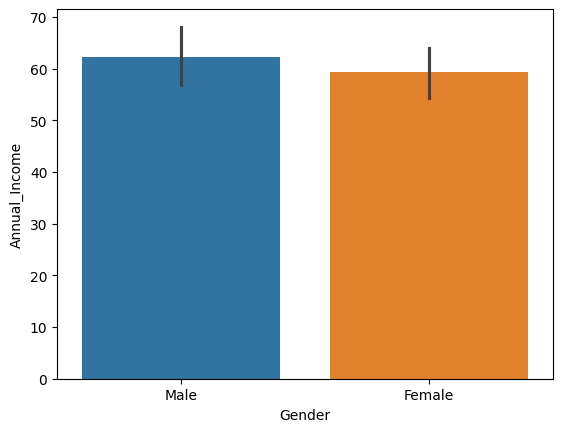

In [29]:
sns.barplot(x='Gender',y='Annual_Income',data=df,hue='Gender')
plt.show()

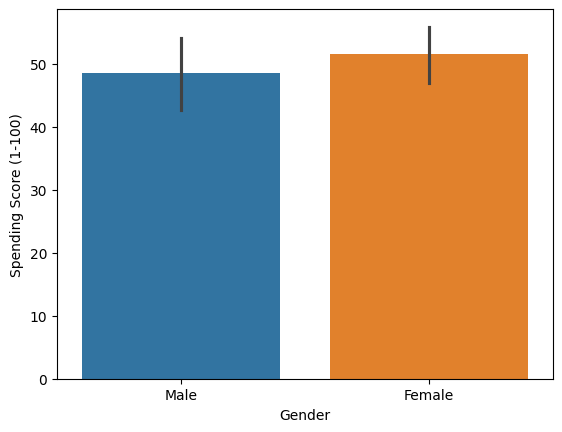

In [30]:
sns.barplot(x='Gender',y='Spending Score (1-100)',data=df,hue='Gender')
plt.show()

In [31]:
df.columns  # check columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income',
       'Spending Score (1-100)'],
      dtype='object')

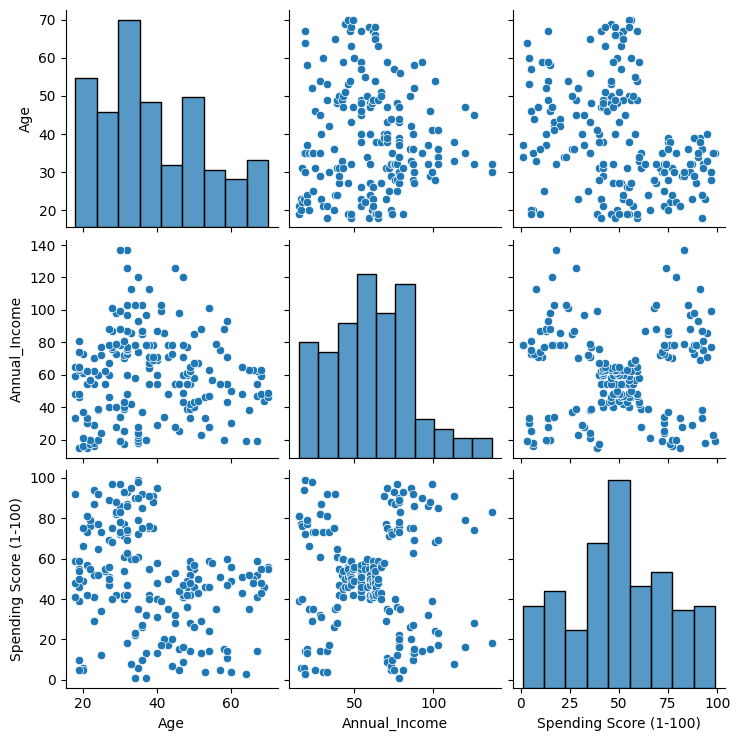

In [32]:
sns.pairplot(df[['Age','Annual_Income','Spending Score (1-100)']])
plt.show()

Based on the exploratory data analysis, here are some observations:

* **Dataset Size and Structure**: The dataset contains 200 entries and 5 columns. There are no missing values in any of the columns.
* **Data Types**: The `CustomerID`, `Age`, `Annual Income (k$)`, and `Spending Score (1-100)` columns are integers, while the `Genre` column is an object (string).
* **Gender Distribution**: The bar plots show the distribution of Age, Annual Income, and Spending Score by Gender. It appears there might be a slightly higher number of female customers in the dataset, but the average Age, Annual Income, and Spending Score seem relatively similar between genders.
* **Summary Statistics**: The descriptive statistics provide a good overview of the numerical columns. We can see the range of values, the mean, median (50th percentile), and standard deviation for each. For example, the average age is around 38.85, and the average spending score is about 50.20.
* **Pairwise Relationships**: The pairplot reveals relationships between Age, Annual Income, and Spending Score.
    * There doesn't seem to be a strong linear correlation between Age and Annual Income or between Age and Spending Score.
    * However, there appears to be some clustering when looking at the relationship between Annual Income and Spending Score. This suggests potential customer segments based on these two features.

In [33]:
# some steps preprocessing
from sklearn.preprocessing import StandardScaler

X = df[['Age','Annual_Income','Spending Score (1-100)']]
X_scaled = StandardScaler().fit_transform(X)


### Apply K-Means Clustering to segment customers


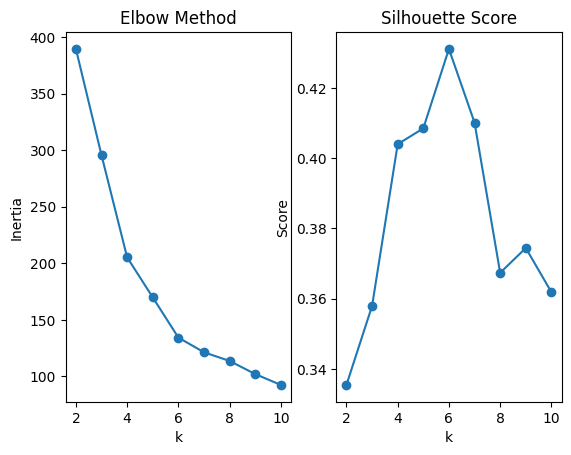

In [34]:
ssd = []
sil = []
K_range = range(2,11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    ssd.append(kmeans.inertia_)
    sil.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure();
plt.subplot(1,2,1);
plt.plot(K_range, ssd, '-o'); plt.title('Elbow Method'); plt.xlabel('k'); plt.ylabel('Inertia')
plt.subplot(1,2,2);
plt.plot(K_range, sil, '-o'); plt.title('Silhouette Score'); plt.xlabel('k'); plt.ylabel('Score')
plt.show()


In [35]:
optimal_k = 5  # as example
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

### Use PCA or t-SNE to visualize the clusters


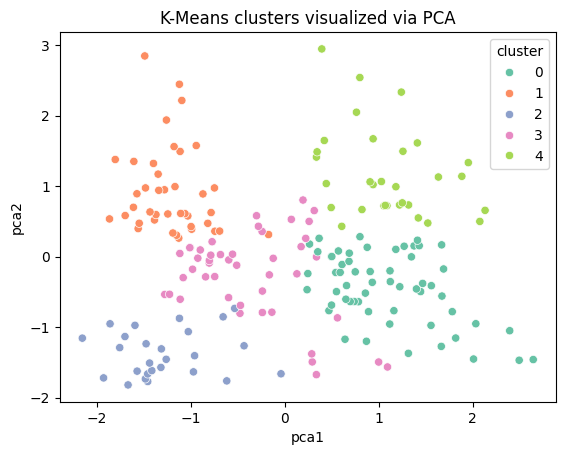

In [36]:
# so I use pca

pca = PCA(n_components=2)
proj = pca.fit_transform(X_scaled)
df['pca1'], df['pca2'] = proj[:,0], proj[:,1]

sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='Set2')
plt.title('K-Means clusters visualized via PCA')
plt.show()


### Segment Analysis & Strategy Development



### Segment Analysis

Now that we have the clusters, let's analyze the characteristics of each segment. We can look at the average values of 'Age', 'Annual_Income', and 'Spending Score (1-100)' for each cluster to understand what defines them.

In [37]:
df.groupby('cluster')[['Age', 'Annual_Income', 'Spending Score (1-100)']].mean()

,Age,Annual_Income,Spending Score (1-100)
cluster,,,
0,55.275862,47.620690,41.706897
1,32.875000,86.100000,81.525000
2,25.769231,26.115385,74.846154
3,26.733333,54.311111,40.911111
4,44.387097,89.774194,18.483871


### Strategy Development

Based on the characteristics of each cluster, we can develop targeted marketing or business strategies. For example:

*   **High Income, High Spending**: These customers are likely prime targets for high-value products and services. Strategies could include loyalty programs, exclusive offers, and personalized recommendations.
*   **Low Income, Low Spending**: These customers might be new or less engaged. Strategies could focus on building interest and encouraging initial purchases, perhaps through discounts or introductory offers.
*   **Low Income, High Spending**: These customers might be impulse buyers or looking for value. Strategies could involve promotions, discounts, and highlighting affordable options.
*   **High Income, Low Spending**: These customers might be saving or spending elsewhere. Strategies could focus on demonstrating value, highlighting quality, and building trust.
*   **Medium Income, Medium Spending**: This could be a broad segment. Strategies might involve a mix of approaches, focusing on retaining these customers and encouraging them to move towards higher spending.

Consider the specific characteristics of each cluster from the analysis above and brainstorm strategies tailored to their needs and behaviors.